<a href="https://colab.research.google.com/github/shashmitharao/Anaemia_Detection/blob/main/anaemia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [15]:

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn import preprocessing
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn.metrics import confusion_matrix, accuracy_score ,precision_score, recall_score,f1_score,classification_report,roc_curve, auc, precision_recall_curve, recall_score, average_precision_score, precision_recall_fscore_support
from sklearn.model_selection import validation_curve
from sklearn import linear_model, tree, ensemble
from sklearn.naive_bayes import MultinomialNB
from IPython import display
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
from sklearn.model_selection import StratifiedKFold
from sklearn.manifold import TSNE
import xgboost as xg

In [16]:
data= pd.read_csv('/content/drive/MyDrive/Anemia_Dataset.csv')

In [17]:
data.head()

,Name,Sex,%Red Pixel,%Green pixel,%Blue pixel,Anaemic
0,Shahalam,M,47.6372,26.7953,25.5675,No
1,Md.Ismail,M,45.6906,30.0735,24.2359,Yes
2,Saiful,M,43.4098,31.2315,25.3586,No
3,Yamin,M,44.4252,28.7436,26.8312,No
4,Tarek,M,44.3297,28.7617,26.9086,No


In [18]:
data.dtypes

,0
Name,object
Sex,object
%Red Pixel,float64
%Green pixel,float64
%Blue pixel,float64
Anaemic,object


In [19]:
le = LabelEncoder()
data["anaemic_encoded"] = le.fit_transform(data['Anaemic'])
data["sex_encoded"] = le.fit_transform(data['Sex'])

In [20]:
data.dtypes

,0
Name,object
Sex,object
%Red Pixel,float64
%Green pixel,float64
%Blue pixel,float64
Anaemic,object
anaemic_encoded,int64
sex_encoded,int64


In [21]:
data.columns

Index(['Name', 'Sex', '   %Red Pixel', '%Green pixel', '%Blue pixel',
       'Anaemic', 'anaemic_encoded', 'sex_encoded'],
      dtype='object')

In [22]:
data.isnull().sum()

,0
Name,0
Sex,0
%Red Pixel,0
%Green pixel,0
%Blue pixel,0
Anaemic,0
anaemic_encoded,0
sex_encoded,0


In [23]:
data.head()

,Name,Sex,%Red Pixel,%Green pixel,%Blue pixel,Anaemic,anaemic_encoded,sex_encoded
0,Shahalam,M,47.6372,26.7953,25.5675,No,0,1
1,Md.Ismail,M,45.6906,30.0735,24.2359,Yes,1,1
2,Saiful,M,43.4098,31.2315,25.3586,No,0,1
3,Yamin,M,44.4252,28.7436,26.8312,No,0,1
4,Tarek,M,44.3297,28.7617,26.9086,No,0,1


In [24]:
data.tail()

,Name,Sex,%Red Pixel,%Green pixel,%Blue pixel,Anaemic,anaemic_encoded,sex_encoded
99,hashina,F,45.7104,27.5693,26.7204,No,0,0
100,purnima dey,F,40.9365,31.9687,27.0948,Yes,1,0
101,nur safa,F,44.9116,30.3761,24.7123,No,0,0
102,kohinur,F,43.4225,29.7889,26.7886,No,0,0
103,khadiza2,F,43.3019,29.8285,26.8697,No,0,0


In [25]:
data.size

832

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             104 non-null    object 
 1   Sex              104 non-null    object 
 2      %Red Pixel    104 non-null    float64
 3   %Green pixel     104 non-null    float64
 4   %Blue pixel      104 non-null    float64
 5   Anaemic          104 non-null    object 
 6   anaemic_encoded  104 non-null    int64  
 7   sex_encoded      104 non-null    int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 6.6+ KB


In [27]:
data.columns

Index(['Name', 'Sex', '   %Red Pixel', '%Green pixel', '%Blue pixel',
       'Anaemic', 'anaemic_encoded', 'sex_encoded'],
      dtype='object')

In [28]:
data.shape

(104, 8)

In [29]:
data.dtypes.value_counts()

,count
object,3
float64,3
int64,2


In [30]:
data.isnull().sum()

,0
Name,0
Sex,0
%Red Pixel,0
%Green pixel,0
%Blue pixel,0
Anaemic,0
anaemic_encoded,0
sex_encoded,0


In [31]:
# data.value_counts()
data["Anaemic"].value_counts()


,count
Anaemic,
No,78
Yes,26


In [32]:
data.describe()

,%Red Pixel,%Green pixel,%Blue pixel,anaemic_encoded,sex_encoded
count,104.000000,104.000000,104.000000,104.00000,104.000000
mean,45.654175,28.875507,25.470325,0.25000,0.528846
std,2.816294,1.554275,1.984671,0.43511,0.501584
min,38.796800,25.140300,19.541300,0.00000,0.000000
25%,43.911375,27.871300,24.896425,0.00000,0.000000
50%,45.385350,28.948750,25.953200,0.00000,1.000000
75%,46.968325,29.887275,26.721600,0.25000,1.000000
max,54.647800,32.368100,29.841400,1.00000,1.000000


,count
Anaemic,
No,78
Yes,26


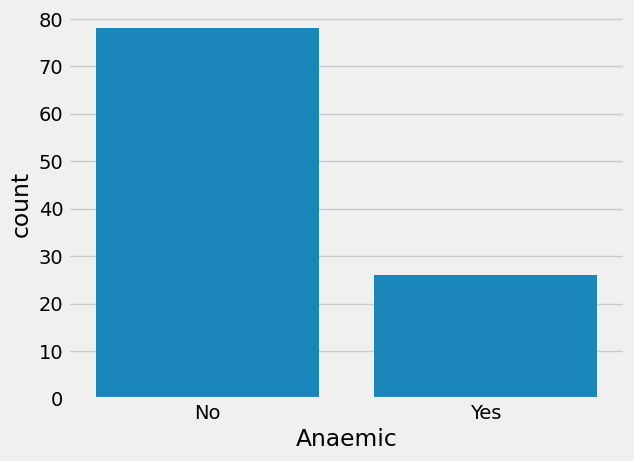

In [33]:
sns.countplot(x="Anaemic", data=data)
data.loc[:,'Anaemic'].value_counts()

In [34]:
data.groupby(['Sex','Anaemic'])['Anaemic'].count()


Sex  Anaemic
F    No         31
     Yes        18
M    No         47
     Yes         8
Name: Anaemic, dtype: int64

<Axes: xlabel='Sex', ylabel='count'>

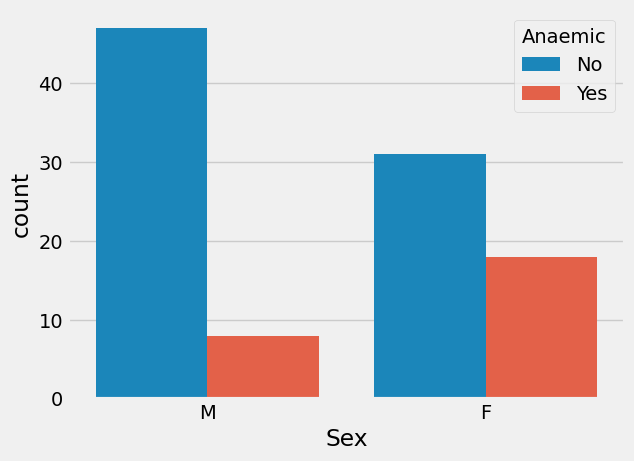

In [35]:
sns.countplot(x ='Sex', hue = "Anaemic", data = data)

<Axes: xlabel='Sex', ylabel='%Blue pixel'>

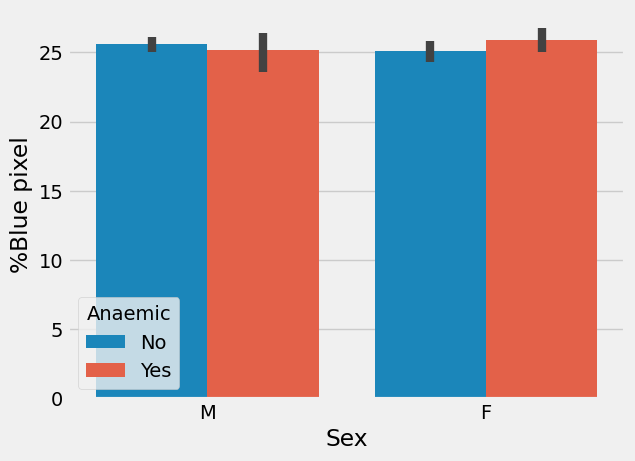

In [36]:
sns.barplot(x='Sex',y="%Blue pixel",hue="Anaemic",data=data)

<Axes: xlabel='Sex', ylabel='%Blue pixel'>

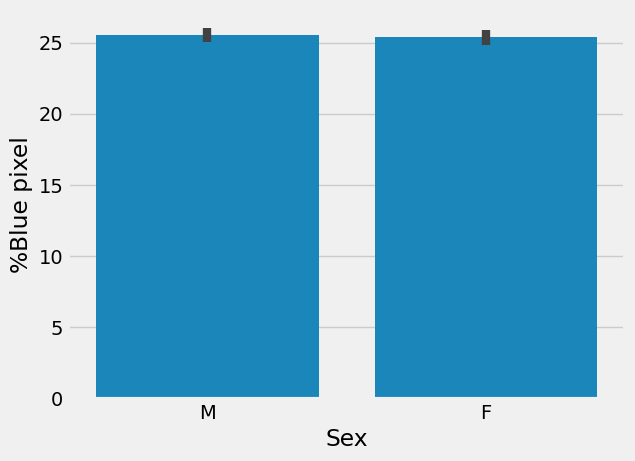

In [37]:
sns.barplot(x="Sex",y="%Blue pixel",data=data)

<Axes: xlabel='Sex', ylabel='%Green pixel'>

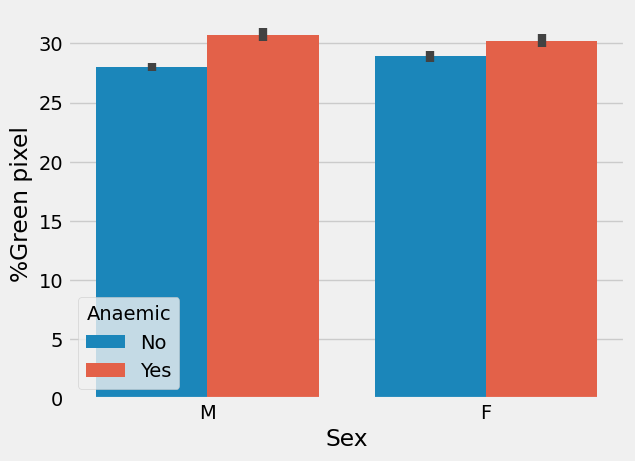

In [38]:
sns.barplot(x="Sex",y="%Green pixel",data=data,hue="Anaemic")

<Axes: xlabel='%Green pixel', ylabel='Density'>

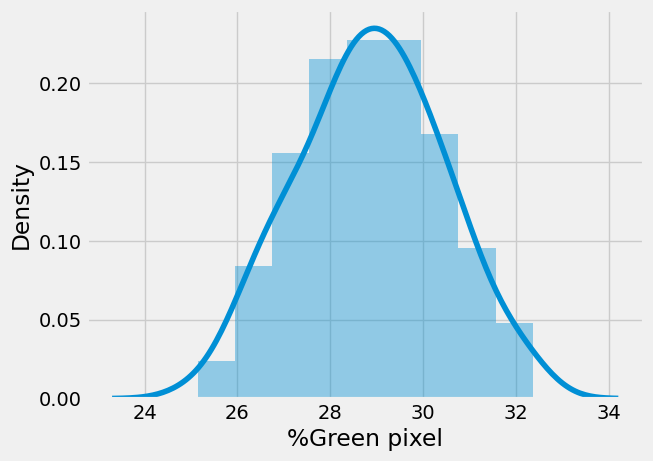

In [39]:
sns.distplot(data["%Green pixel"])

<Axes: ylabel='Anaemic'>

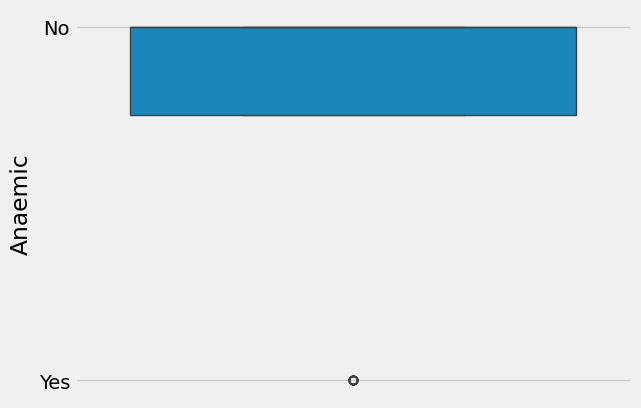

In [41]:
sns.boxplot(data["Anaemic"])

In [40]:
data.shape


(104, 8)

<Axes: >

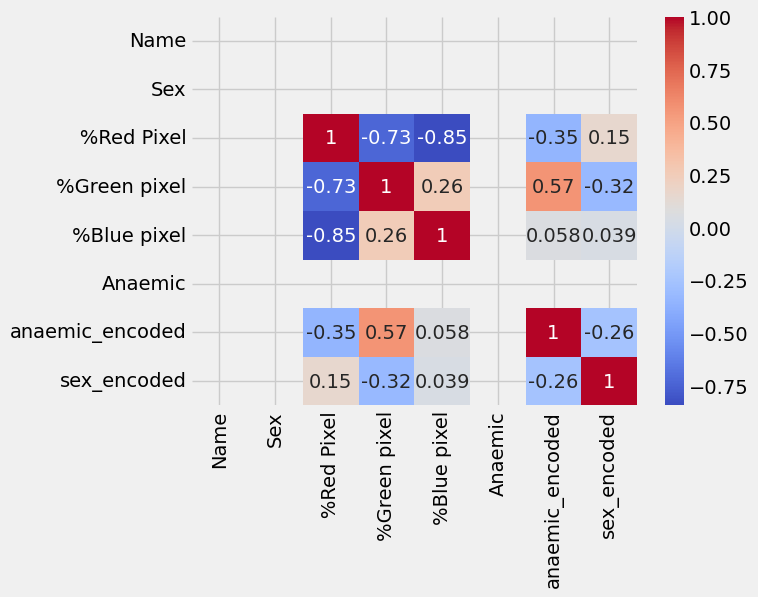

In [44]:
# Convert columns with numeric values to float
numeric_data = data.apply(pd.to_numeric, errors='coerce')

# Drop non-numeric columns
numeric_data = numeric_data.select_dtypes(include=['number'])

# Calculate the correlation matrix for numeric columns only
sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm")

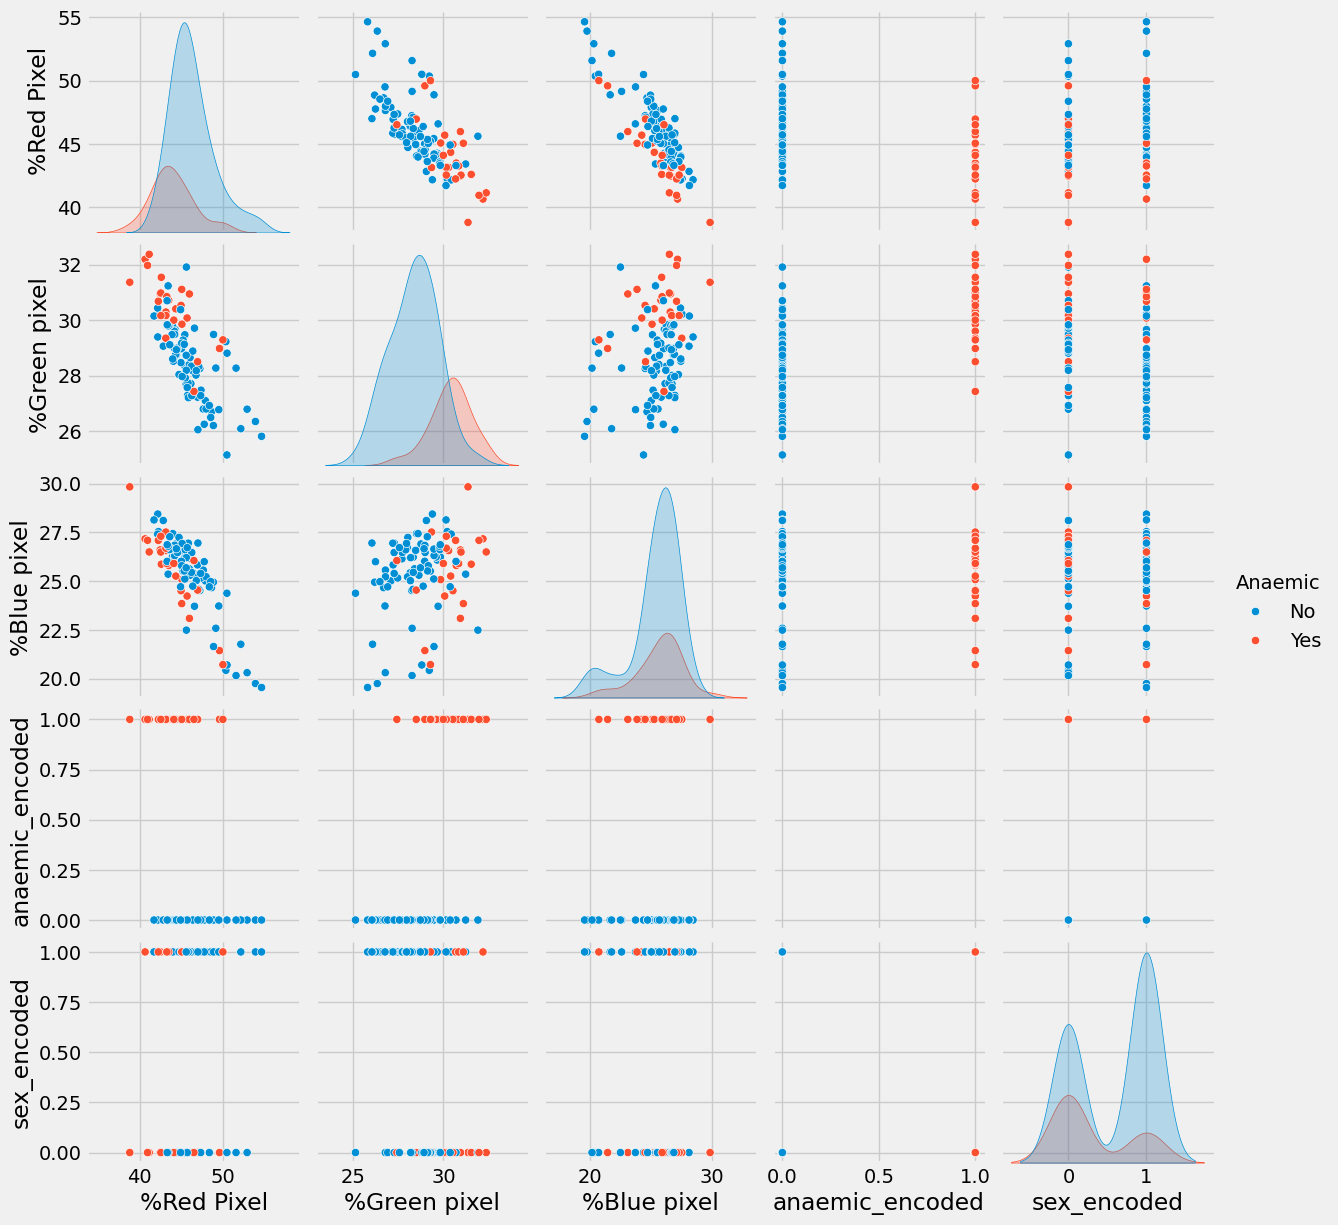

In [45]:
sns.pairplot(data,hue="Anaemic")

In [53]:
d = preprocessing.normalize(data.iloc[:,2:5], axis=0)
scaled_df = pd.DataFrame(d, columns=["%Red Pixel","%Green pixel", "%Blue pixel"])
scaled_df.head()

,%Red Pixel,%Green pixel,%Blue pixel
0,0.102125,0.090864,0.098138
1,0.097952,0.101980,0.093026
2,0.093062,0.105907,0.097336
3,0.095239,0.097470,0.102988
4,0.095034,0.097532,0.103285


In [54]:
total_datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.05,
    height_shift_range=0.05,
    rescale=1./255,
    shear_range=0.05,
    brightness_range=[0.1, 1.5],
    horizontal_flip=True,
    vertical_flip=True
)

In [55]:
X=data[[ 'sex_encoded', '   %Red Pixel', '%Green pixel', '%Blue pixel']]
y=data["anaemic_encoded"]
train_X,test_X,train_Y,test_Y=train_test_split(X,y,test_size=0.3,random_state=0)
train_X,val_X,train_Y,val_Y=train_test_split(train_X,train_Y,test_size=0.3,random_state=0)
len(train_X), len(train_Y), len(test_X), len(test_Y)

(50, 50, 32, 32)

In [56]:
kf =KFold(n_splits=5, shuffle=True, random_state=42)

cnt = 1
for train_index, test_index in kf.split(train_X, train_Y):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt += 1

Fold:1, Train set: 40, Test set:10
Fold:2, Train set: 40, Test set:10
Fold:3, Train set: 40, Test set:10
Fold:4, Train set: 40, Test set:10
Fold:5, Train set: 40, Test set:10


In [57]:
train_X.head()

,sex_encoded,%Red Pixel,%Green pixel,%Blue pixel
53,0,49.5899,28.9754,21.4347
73,0,51.5802,28.2678,20.1520
76,1,49.9999,29.2860,20.7141
27,1,45.9659,28.4015,25.6326
46,0,46.9597,28.4993,24.5410


In [58]:
train_Y.head()

,anaemic_encoded
53,1
73,0
76,1
27,0
46,1


In [59]:
test_X.head()

,sex_encoded,%Red Pixel,%Green pixel,%Blue pixel
26,1,45.5833,27.6916,26.7252
61,0,50.4801,25.1403,24.3796
2,1,43.4098,31.2315,25.3586
62,0,46.2550,27.2758,26.4692
85,0,43.2870,30.6972,26.0158


In [70]:
test_Y.head()

,anaemic_encoded
26,0
61,0
2,0
62,0
85,0


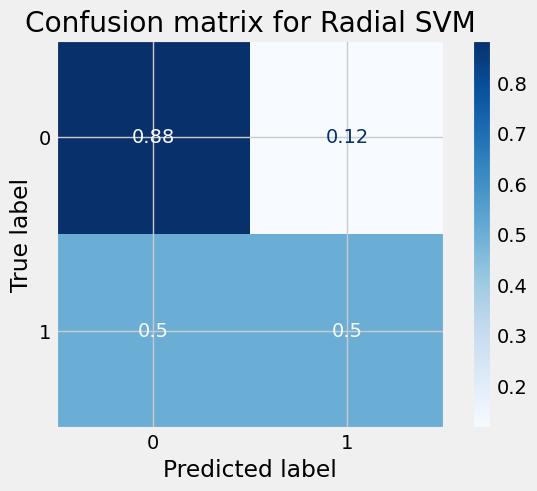

Accuracy for rbf SVM is: 0.8125
              precision    recall  f1-score   support

        no 0       0.88      0.88      0.88        26
       yes 1       0.50      0.50      0.50         6

    accuracy                           0.81        32
   macro avg       0.69      0.69      0.69        32
weighted avg       0.81      0.81      0.81        32



In [68]:

# Import the necessary modules
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import ConfusionMatrixDisplay # Import ConfusionMatrixDisplay

# Assuming you have already defined train_X, train_Y, test_X, and test_Y
rbf = SVC(kernel='rbf', C=1, gamma=0.1)
rbf.fit(train_X, train_Y)

# Evaluate by means of a confusion matrix
# Use ConfusionMatrixDisplay instead of plot_confusion_matrix
cm = confusion_matrix(test_Y, rbf.predict(test_X), normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion matrix for Radial SVM')
plt.show()

# Generate predictions
y_pred = rbf.predict(test_X)

# Evaluate by means of accuracy
accuracy = accuracy_score(test_Y, y_pred)
print(f'Accuracy for rbf SVM is: {accuracy}')

target_names = ['no 0', 'yes 1']
print(classification_report(test_Y, y_pred, target_names=target_names))

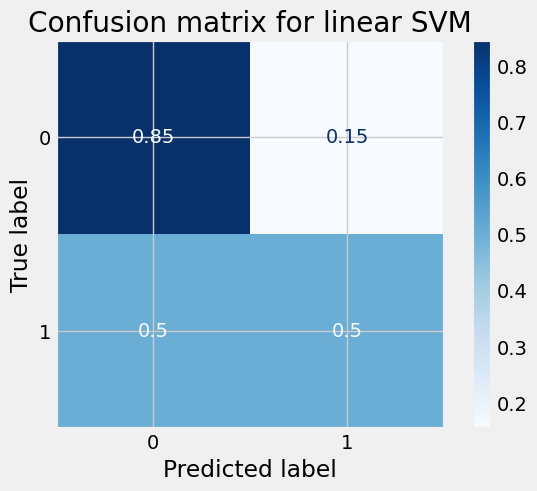

Accuracy for linear SVM is: 0.78125
Accuracy Validation for linear SVM is: 0.8181818181818182
              precision    recall  f1-score   support

        no 0       0.88      0.85      0.86        26
       yes 1       0.43      0.50      0.46         6

    accuracy                           0.78        32
   macro avg       0.65      0.67      0.66        32
weighted avg       0.80      0.78      0.79        32



In [71]:



svc=svm.SVC(kernel='linear',C=0.1,gamma=0.1)
svc.fit(train_X,train_Y)

# Evaluate by means of a confusion matrix
# Use ConfusionMatrixDisplay instead of plot_confusion_matrix
cm = confusion_matrix(test_Y, svc.predict(test_X), normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot(cmap=plt.cm.Blues) #removed confusionmatrix from plt.show()
plt.title('Confusion matrix for linear SVM')
plt.show()


# Generate predictions
y_pred = svc.predict(test_X)
y_pred_val = svc.predict(val_X)
tn, fp, fn, tp = confusion_matrix(test_Y, y_pred).ravel()
# Evaluate by means of accuracy
accuracy = accuracy_score(test_Y, y_pred)
print(f'Accuracy for linear SVM is: {accuracy}')
val_accuracy = accuracy_score(val_Y, y_pred_val)
print(f'Accuracy Validation for linear SVM is: {val_accuracy}')
target_names = ['no 0', 'yes 1']
print(classification_report(test_Y,y_pred, target_names=target_names))

In [72]:
class_weight = {0: 1.,
                1: 3.04}
C_range=list(np.arange(0.2,1.9,0.1))
acc_scoreLSVM=[]
for c in C_range:
    print(c)
    svc = svm.SVC(kernel='linear', C=c,max_iter=500000,class_weight=class_weight)
    scores = cross_val_score(svc,train_X, train_Y, cv= kf, scoring="accuracy")
    print(scores)
    acc_scoreLSVM.append(scores.mean())
print(acc_scoreLSVM)

0.2
[0.6 0.8 0.7 0.8 0.7]
0.30000000000000004
[0.5 0.8 0.7 0.8 0.7]
0.4000000000000001
[0.5 0.8 0.7 0.8 0.7]
0.5000000000000001
[0.5 0.8 0.7 0.8 0.7]
0.6000000000000001
[0.5 0.8 0.7 0.8 0.7]
0.7000000000000002
[0.5 0.8 0.7 0.7 0.8]
0.8000000000000003
[0.5 0.8 0.7 0.7 0.8]
0.9000000000000001
[0.5 0.8 0.7 0.7 0.8]
1.0000000000000002
[0.5 0.8 0.7 0.7 0.8]
1.1000000000000003
[0.5 0.8 0.7 0.7 0.8]
1.2000000000000004
[0.5 0.8 0.7 0.7 0.8]
1.3000000000000003
[0.5 0.8 0.7 0.7 0.8]
1.4000000000000004
[0.5 0.8 0.7 0.7 0.8]
1.5000000000000004
[0.5 0.8 0.7 0.7 0.8]
1.6000000000000003
[0.5 0.8 0.7 0.7 0.8]
1.7000000000000004
[0.5 0.8 0.7 0.7 0.8]
1.8000000000000005
[0.5 0.8 0.7 0.7 0.8]
[0.72, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7]


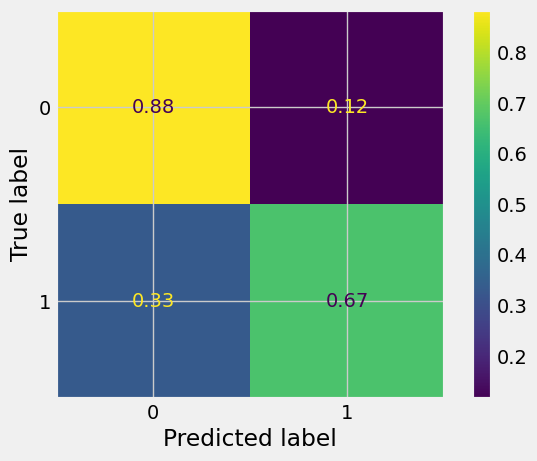

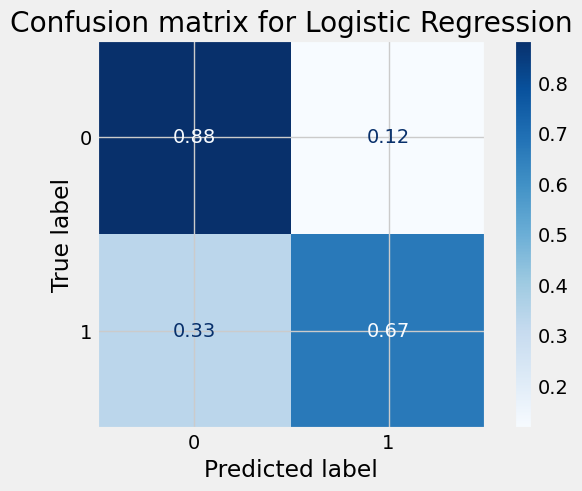

Accuracy for Logistic Regression is: 0.84375
Accuracy Validation for Logistic Regression is: 0.8181818181818182
              precision    recall  f1-score   support

        no 0       0.92      0.88      0.90        26
       yes 1       0.57      0.67      0.62         6

    accuracy                           0.84        32
   macro avg       0.75      0.78      0.76        32
weighted avg       0.85      0.84      0.85        32



In [75]:

from sklearn.linear_model import LogisticRegression # Import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import ConfusionMatrixDisplay # Import ConfusionMatrixDisplay


lr = LogisticRegression()
lr.fit(train_X,train_Y)

# Evaluate by means of a confusion matrix
# Use ConfusionMatrixDisplay.from_estimator instead of plot_confusion_matrix
cm = ConfusionMatrixDisplay.from_estimator(lr, test_X, test_Y, normalize='true')

cm.plot(cmap=plt.cm.Blues) #removed confusionmatrix from plt.show()
plt.title('Confusion matrix for Logistic Regression')
plt.show()

# Generate predictions
y_pred = lr.predict(test_X)
y_pred_val = lr.predict(val_X)
tn, fp, fn, tp = confusion_matrix(test_Y, y_pred).ravel()
# Evaluate by means of accuracy
accuracy = accuracy_score(test_Y, y_pred)
print(f'Accuracy for Logistic Regression is: {accuracy}')

val_accuracy = accuracy_score(val_Y, y_pred_val)
print(f'Accuracy Validation for Logistic Regression is: {val_accuracy}')

target_names = ['no 0', 'yes 1']
print(classification_report(test_Y,y_pred, target_names=target_names))

In [76]:
score = cross_val_score(linear_model.LogisticRegression(random_state= 42), train_X, train_Y, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Scores for each fold are: [0.7 0.9 0.9 0.9 0.9]
Average score: 0.86


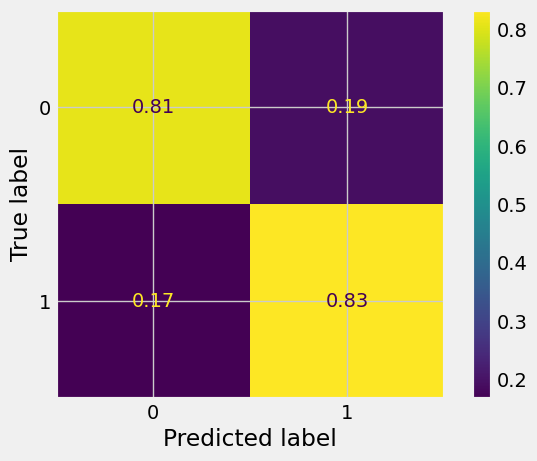

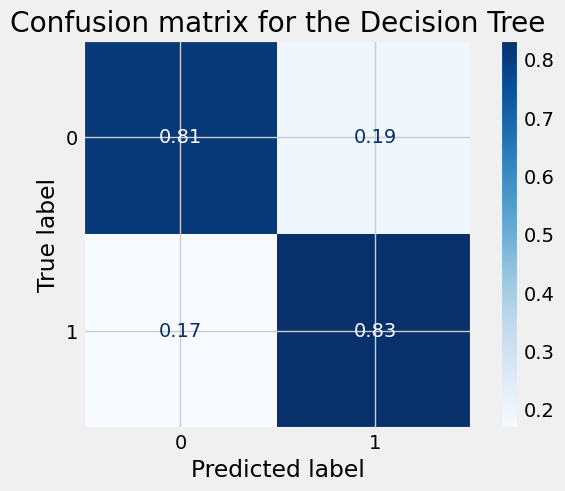

Accuracy for the Decision Tree is: 0.8125
Accuracy Validation for the Decision Tree is: 0.9090909090909091
              precision    recall  f1-score   support

        no 0       0.95      0.81      0.88        26
       yes 1       0.50      0.83      0.62         6

    accuracy                           0.81        32
   macro avg       0.73      0.82      0.75        32
weighted avg       0.87      0.81      0.83        32



In [78]:



dt=DecisionTreeClassifier()
dt.fit(train_X,train_Y)

# Evaluate by means of a confusion matrix
# Use ConfusionMatrixDisplay.from_estimator instead of plot_confusion_matrix
cm = ConfusionMatrixDisplay.from_estimator(dt, test_X, test_Y, normalize='true')

cm.plot(cmap=plt.cm.Blues) #removed confusionmatrix from plt.show()
plt.title('Confusion matrix for the Decision Tree')
plt.show()

# Generate predictions
y_pred = dt.predict(test_X)
y_pred_val = dt.predict(val_X)
tn, fp, fn, tp = confusion_matrix(test_Y, y_pred).ravel()
# Evaluate by means of accuracy
accuracy = accuracy_score(test_Y, y_pred)
print(f'Accuracy for the Decision Tree is: {accuracy}')

val_accuracy = accuracy_score(val_Y, y_pred_val)
print(f'Accuracy Validation for the Decision Tree is: {val_accuracy}')

target_names = ['no 0', 'yes 1']
print(classification_report(test_Y,y_pred, target_names=target_names))


In [79]:
max_depth = [1,2,3,4,5,6,7,8,9,10]

for val in max_depth:
    score = cross_val_score(tree.DecisionTreeClassifier(max_depth= val, random_state= 42), train_X, train_Y, cv= kf, scoring="accuracy")
    print(f'Average score({val}): {"{:.3f}".format(score.mean())}')

Average score(1): 0.800
Average score(2): 0.800
Average score(3): 0.760
Average score(4): 0.680
Average score(5): 0.660
Average score(6): 0.720
Average score(7): 0.720
Average score(8): 0.720
Average score(9): 0.720
Average score(10): 0.720


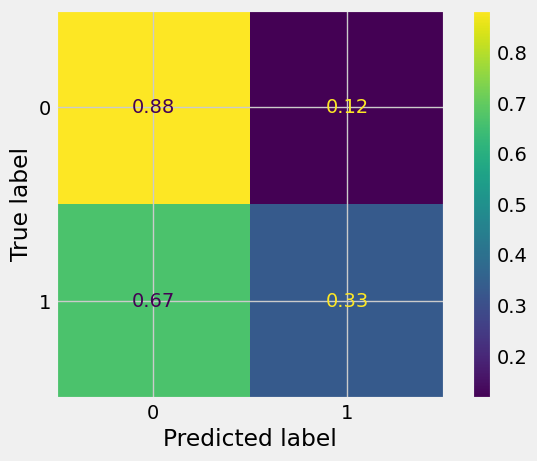

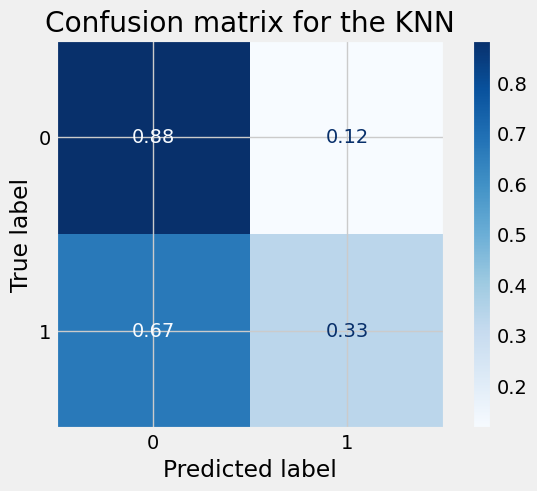

Accuracy for the KNN is: 0.78125
Accuracy Validation for the KNN is: 0.8636363636363636
              precision    recall  f1-score   support

        no 0       0.85      0.88      0.87        26
       yes 1       0.40      0.33      0.36         6

    accuracy                           0.78        32
   macro avg       0.63      0.61      0.62        32
weighted avg       0.77      0.78      0.77        32



In [83]:
# Import the necessary modules
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier # Make sure to import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import ConfusionMatrixDisplay # Import ConfusionMatrixDisplay


knn=KNeighborsClassifier()
knn.fit(train_X,train_Y)

# Evaluate by means of a confusion matrix
# Use ConfusionMatrixDisplay.from_estimator instead of plot_confusion_matrix
cm = ConfusionMatrixDisplay.from_estimator(knn, test_X, test_Y, normalize='true')

cm.plot(cmap=plt.cm.Blues) #removed confusionmatrix from plt.show()
plt.title('Confusion matrix for the KNN')
plt.show()

# Generate predictions
y_pred = knn.predict(test_X)
y_pred_val = knn.predict(val_X)
tn, fp, fn, tp = confusion_matrix(test_Y, y_pred).ravel()
# Evaluate by means of accuracy
accuracy = accuracy_score(test_Y, y_pred)
print(f'Accuracy for the KNN is: {accuracy}')
val_accuracy = accuracy_score(val_Y, y_pred_val)
print(f'Accuracy Validation for the KNN is: {val_accuracy}')

target_names = ['no 0', 'yes 1']
print(classification_report(test_Y,y_pred, target_names=target_names))

In [84]:
knn_5 = KNeighborsClassifier(n_neighbors=5)


# fit the model to the training set
knn_5.fit(train_X,train_Y)


# predict on the test-set
y_pred_5 = knn_5.predict(test_X)


print('Model accuracy score with k=5 : {0:0.4f}'. format(accuracy_score(test_Y, y_pred_5)))

Model accuracy score with k=5 : 0.7812


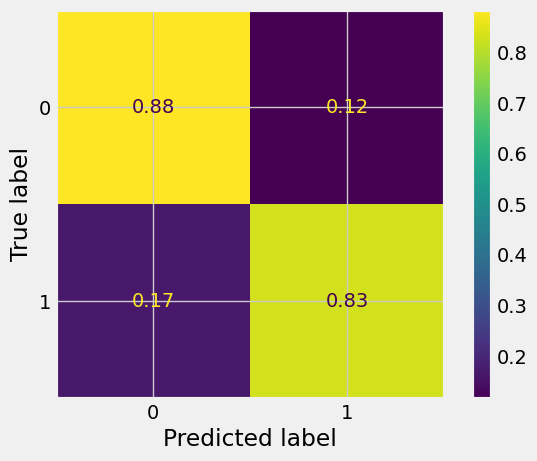

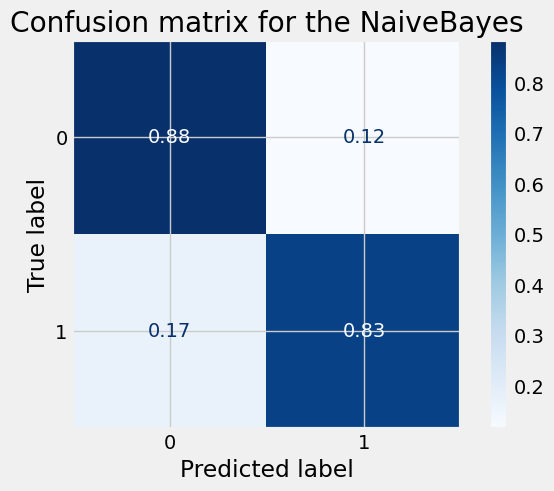

Accuracy for the NaiveBayes is: 0.875
Accuracy Validation for the NaiveBayes is: 0.9090909090909091
              precision    recall  f1-score   support

        no 0       0.96      0.88      0.92        26
       yes 1       0.62      0.83      0.71         6

    accuracy                           0.88        32
   macro avg       0.79      0.86      0.82        32
weighted avg       0.90      0.88      0.88        32



In [86]:
# Import the necessary modules
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import ConfusionMatrixDisplay # Import ConfusionMatrixDisplay


gnb=GaussianNB()
gnb.fit(train_X,train_Y)

# Evaluate by means of a confusion matrix
# Use ConfusionMatrixDisplay.from_estimator instead of plot_confusion_matrix
cm = ConfusionMatrixDisplay.from_estimator(gnb, test_X, test_Y, normalize='true')

cm.plot(cmap=plt.cm.Blues) #removed confusionmatrix from plt.show()
plt.title('Confusion matrix for the NaiveBayes')
plt.show()

# Generate predictions
y_pred = gnb.predict(test_X)
y_pred_val = gnb.predict(val_X)
tn, fp, fn, tp = confusion_matrix(test_Y, y_pred).ravel()
# Evaluate by means of accuracy
accuracy = accuracy_score(test_Y, y_pred)
print(f'Accuracy for the NaiveBayes is: {accuracy}')
val_accuracy = accuracy_score(val_Y, y_pred_val)
print(f'Accuracy Validation for the NaiveBayes is: {val_accuracy}')

target_names = ['no 0', 'yes 1']
print(classification_report(test_Y,y_pred, target_names=target_names))

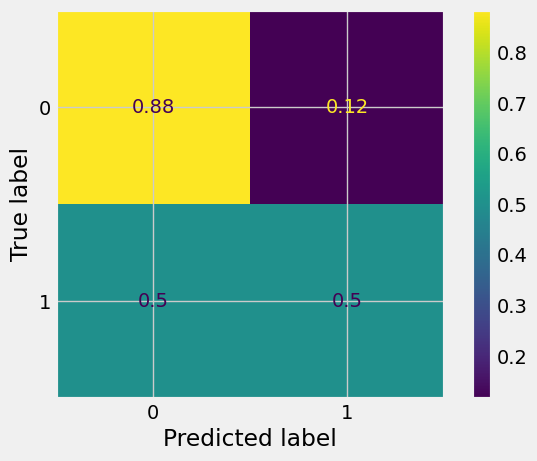

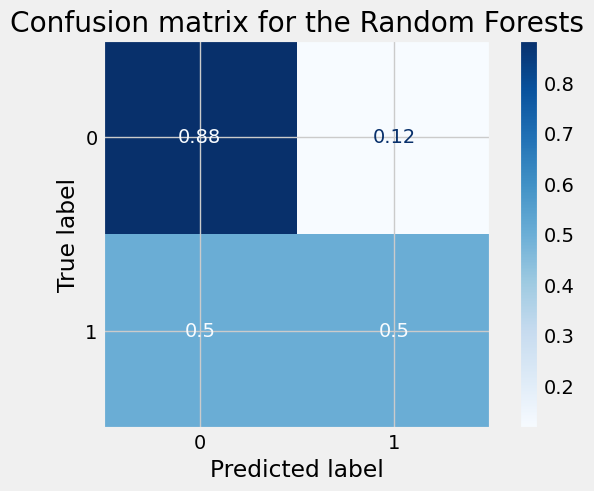

Accuracy for the Random Forests is: 0.8125
Accuracy Validation for the Random Forests is: 0.8636363636363636
              precision    recall  f1-score   support

        no 0       0.88      0.88      0.88        26
       yes 1       0.50      0.50      0.50         6

    accuracy                           0.81        32
   macro avg       0.69      0.69      0.69        32
weighted avg       0.81      0.81      0.81        32



In [88]:
# Import the necessary modules
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import ConfusionMatrixDisplay # Import ConfusionMatrixDisplay


rfc=RandomForestClassifier(n_estimators=100)
rfc.fit(train_X,train_Y)

# Evaluate by means of a confusion matrix
# Use ConfusionMatrixDisplay.from_estimator instead of plot_confusion_matrix
cm = ConfusionMatrixDisplay.from_estimator(rfc, test_X, test_Y, normalize='true')

cm.plot(cmap=plt.cm.Blues) #removed confusionmatrix from plt.show()
plt.title('Confusion matrix for the Random Forests')
plt.show()

# Generate predictions
y_pred = rfc.predict(test_X)
y_pred_val = rfc.predict(val_X)
tn, fp, fn, tp = confusion_matrix(test_Y, y_pred).ravel()
# Evaluate by means of accuracy
accuracy = accuracy_score(test_Y, y_pred)
print(f'Accuracy for the Random Forests is: {accuracy}')

val_accuracy = accuracy_score(val_Y, y_pred_val)
print(f'Accuracy Validation for the Random Forests is: {val_accuracy}')

target_names = ['no 0', 'yes 1']
print(classification_report(test_Y,y_pred, target_names=target_names))

In [89]:
score = cross_val_score(ensemble.RandomForestClassifier(random_state= 42),train_X, train_Y, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Scores for each fold are: [0.7 0.8 0.9 0.8 0.6]
Average score: 0.76


,Non-Anaemic 0,Anaemic 1,accuracy,macro avg,weighted avg
precision,0.846154,0.909091,0.86,0.877622,0.866294
recall,0.970588,0.625000,0.86,0.797794,0.860000
f1-score,0.904110,0.740741,0.86,0.822425,0.851832
support,34.000000,16.000000,0.86,50.000000,50.000000


<Figure size 2000x2000 with 0 Axes>

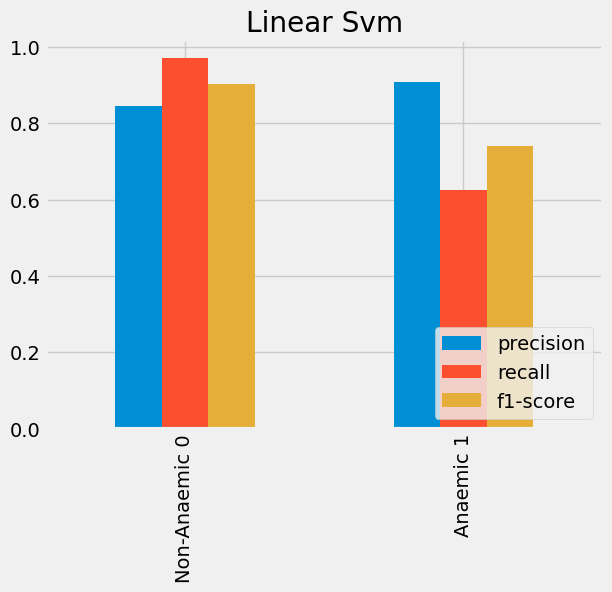

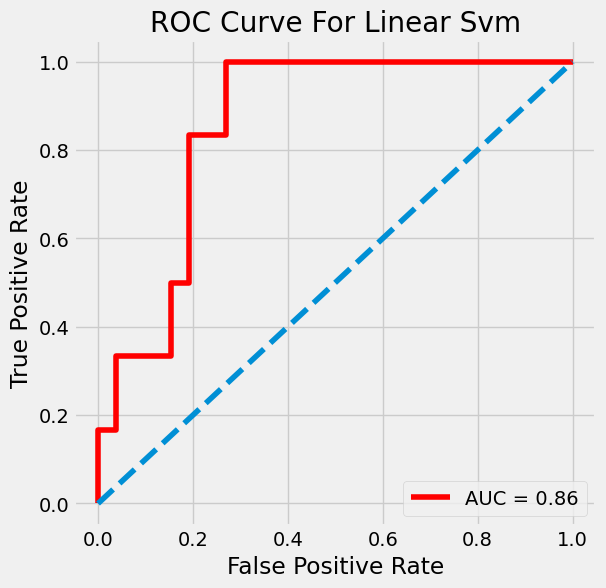



*********************************************************************************************




,Non-Anaemic 0,Anaemic 1,accuracy,macro avg,weighted avg
precision,0.680000,0.0,0.68,0.340000,0.462400
recall,1.000000,0.0,0.68,0.500000,0.680000
f1-score,0.809524,0.0,0.68,0.404762,0.550476
support,34.000000,16.0,0.68,50.000000,50.000000


<Figure size 2000x2000 with 0 Axes>

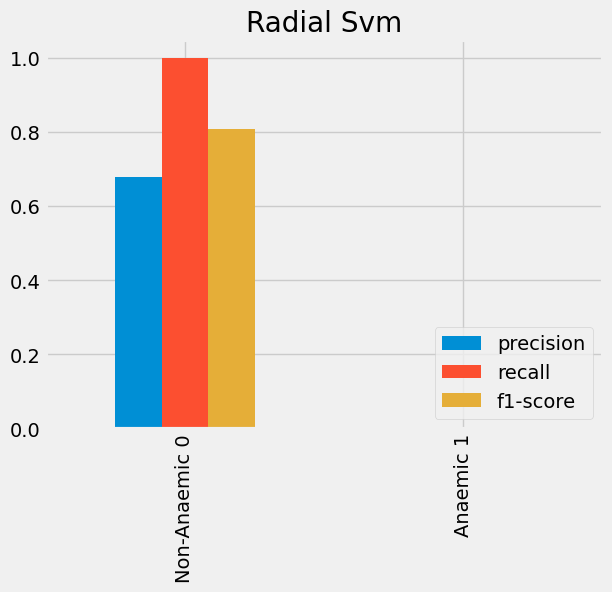

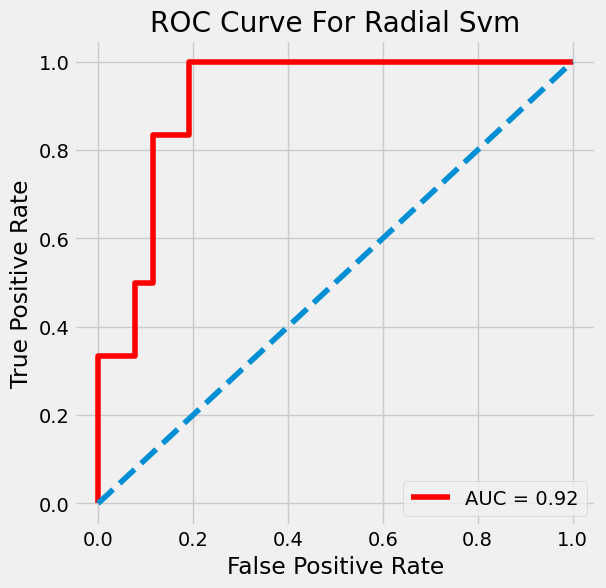



*********************************************************************************************




,Non-Anaemic 0,Anaemic 1,accuracy,macro avg,weighted avg
precision,0.861111,0.785714,0.84,0.823413,0.836984
recall,0.911765,0.687500,0.84,0.799632,0.840000
f1-score,0.885714,0.733333,0.84,0.809524,0.836952
support,34.000000,16.000000,0.84,50.000000,50.000000


<Figure size 2000x2000 with 0 Axes>

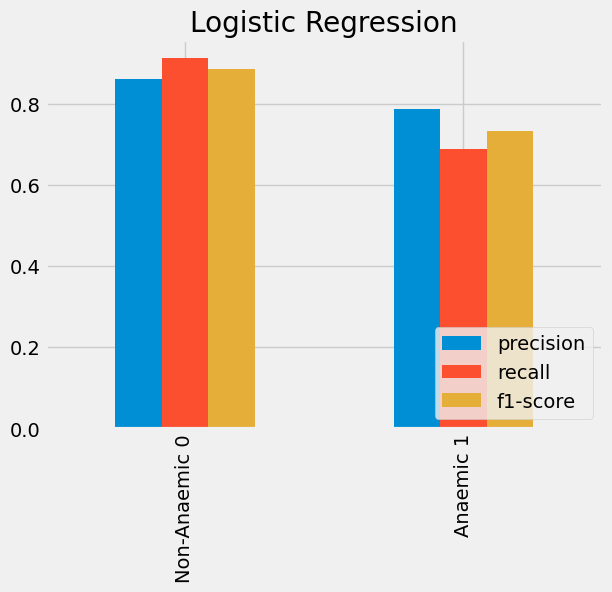

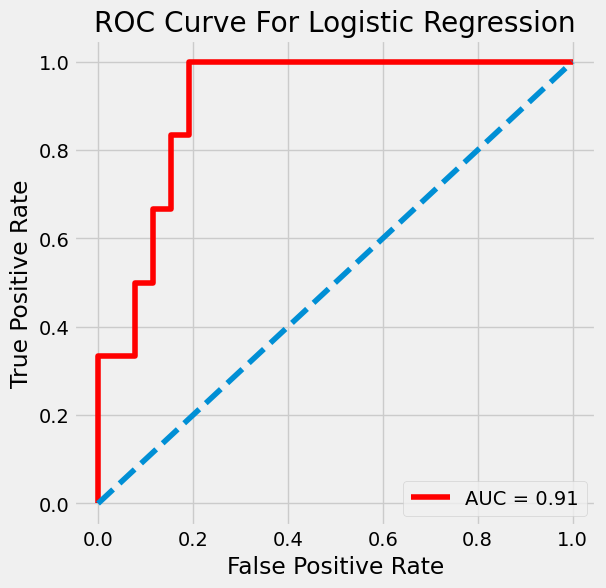



*********************************************************************************************




,Non-Anaemic 0,Anaemic 1,accuracy,macro avg,weighted avg
precision,0.785714,0.875000,0.8,0.830357,0.814286
recall,0.970588,0.437500,0.8,0.704044,0.800000
f1-score,0.868421,0.583333,0.8,0.725877,0.777193
support,34.000000,16.000000,0.8,50.000000,50.000000


<Figure size 2000x2000 with 0 Axes>

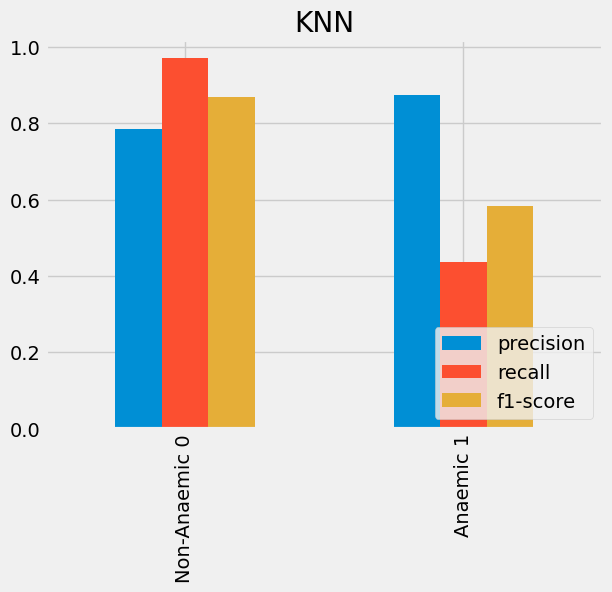

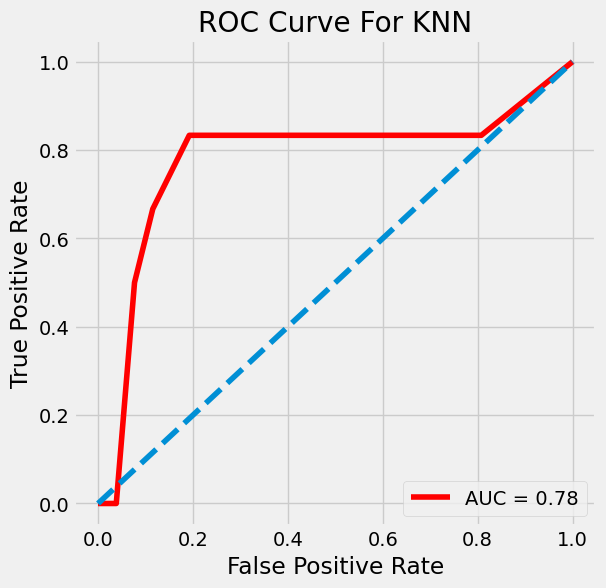



*********************************************************************************************




,Non-Anaemic 0,Anaemic 1,accuracy,macro avg,weighted avg
precision,1.0,1.0,1.0,1.0,1.0
recall,1.0,1.0,1.0,1.0,1.0
f1-score,1.0,1.0,1.0,1.0,1.0
support,34.0,16.0,1.0,50.0,50.0


<Figure size 2000x2000 with 0 Axes>

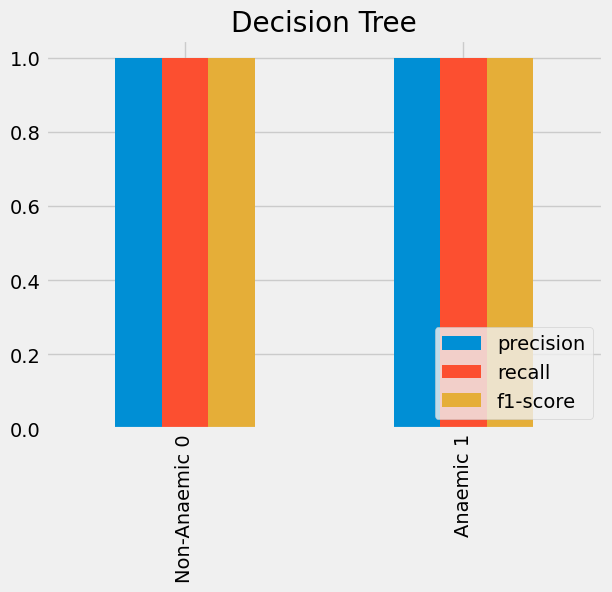

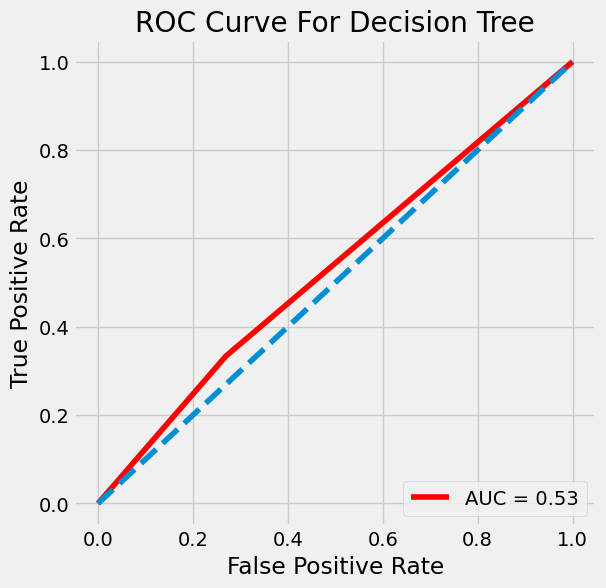



*********************************************************************************************




,Non-Anaemic 0,Anaemic 1,accuracy,macro avg,weighted avg
precision,0.818182,0.588235,0.74,0.703209,0.744599
recall,0.794118,0.625000,0.74,0.709559,0.740000
f1-score,0.805970,0.606061,0.74,0.706015,0.741999
support,34.000000,16.000000,0.74,50.000000,50.000000


<Figure size 2000x2000 with 0 Axes>

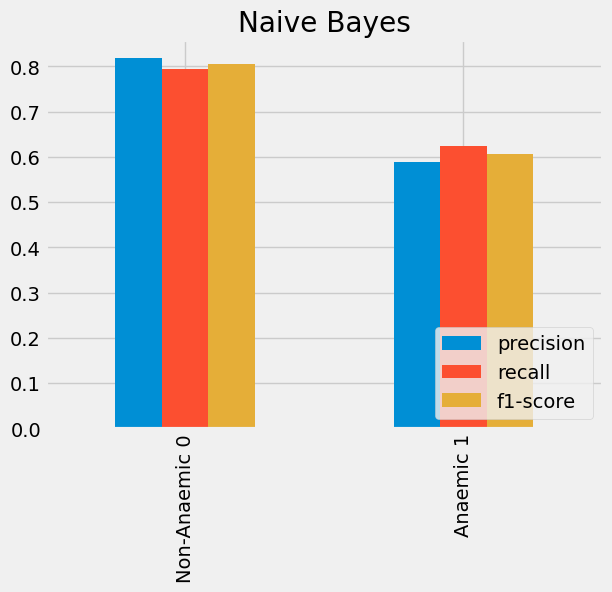

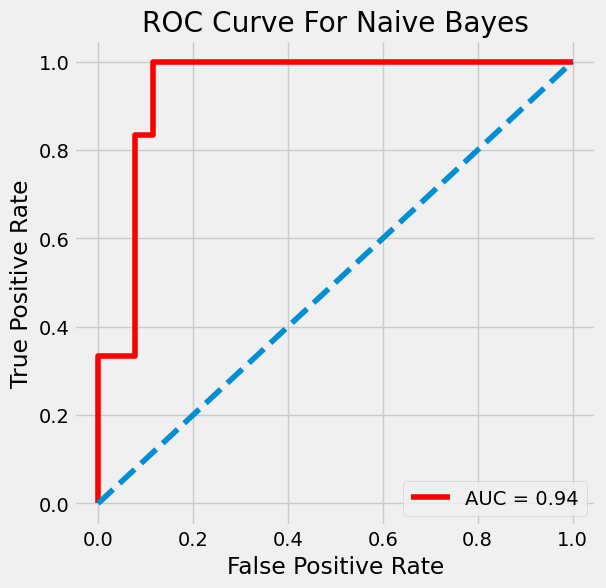



*********************************************************************************************




,Non-Anaemic 0,Anaemic 1,accuracy,macro avg,weighted avg
precision,1.0,1.0,1.0,1.0,1.0
recall,1.0,1.0,1.0,1.0,1.0
f1-score,1.0,1.0,1.0,1.0,1.0
support,34.0,16.0,1.0,50.0,50.0


<Figure size 2000x2000 with 0 Axes>

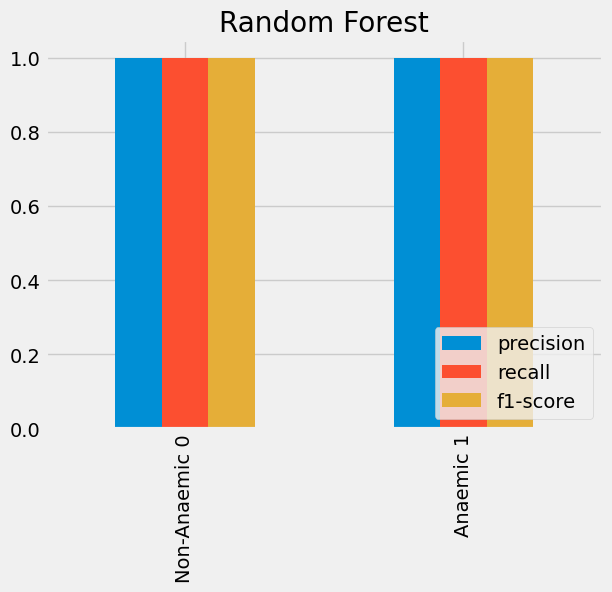

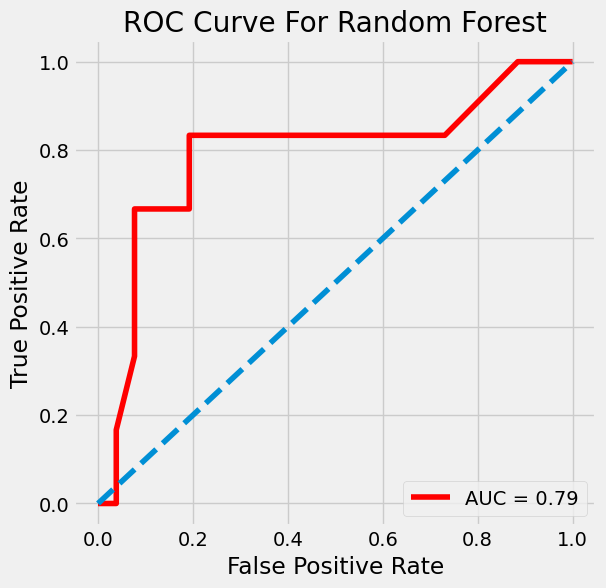



*********************************************************************************************




In [92]:
kfold = KFold(n_splits=10) # k=10, split the data into 10 equal parts
cv_mean=[]
accuracy=[]
std=[]
precision = []
recall = []
f1score = []
minimum = []
maximum = []
classifiers=[
    'Linear Svm',
    'Radial Svm',
    'Logistic Regression',
     'KNN',
    'Decision Tree',
    'Naive Bayes',
    'Random Forest'
]
models=[
    svm.SVC(kernel='linear',probability=True),
    svm.SVC(kernel='rbf',probability=True),
    LogisticRegression(),
    KNeighborsClassifier(n_neighbors=9),
    DecisionTreeClassifier(),
    GaussianNB(),
    RandomForestClassifier(n_estimators=100)
]
for index,model in enumerate(models):
    cv_result = cross_val_score(model,train_X,train_Y, cv = kfold,scoring = "accuracy")
    cv_mean.append(cv_result.mean())
    std.append(cv_result.std())
    minimum.append(cv_result.min())
    maximum.append(cv_result.max())
    model.fit(train_X, train_Y)
    y_score = model.predict(train_X)
    acc = metrics.accuracy_score(y_true = train_Y, y_pred = y_score)
    pre = metrics.precision_score(y_true = train_Y, y_pred = y_score)
    rec = metrics.recall_score(y_true = train_Y, y_pred = y_score)
    f1 = metrics.f1_score(y_true = train_Y, y_pred = y_score)
    accuracy.append(acc)
    precision.append(pre)
    recall.append(rec)
    f1score.append(f1)
    target_names = ['Non-Anaemic 0', 'Anaemic 1']
    report1 = classification_report(train_Y,y_score, target_names=target_names,  output_dict=True)
    display.display(pd.DataFrame(report1))
    df = pd.DataFrame(report1)
    plt.figure(figsize=(20,20))
    df.iloc[:3, :2].T.plot(kind='bar')
    plt.legend(loc='lower right')
    plt.title(classifiers[index])
    plt.show()
    y_prob = model.predict_proba(test_X)[:,1]
    false_positive_rate, true_positive_rate, thresholds = roc_curve(test_Y, y_prob)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    plt.figure(figsize=(6,6))
    plt.title('ROC Curve For '+ classifiers[index])
    plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],linestyle='--')
    plt.axis('tight')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    print("\n")
    print("*********************************************************************************************")
    print("\n")

In [93]:
# Logistic regression
modelLR = LogisticRegression()
modelLR.fit(train_X,train_Y)
y_pred_prob_lr = modelLR.predict_proba(test_X)[:,1]
fpr_lr, tpr_lr, thresholds_lr = roc_curve(test_Y, y_pred_prob_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)
precision_lr, recall_lr, th_lr = precision_recall_curve(test_Y, y_pred_prob_lr)

# SVM with rbf
modelSVMrbf=svm.SVC(kernel='rbf', probability=True)
modelSVMrbf.fit(train_X,train_Y)
y_pred_prob_SVMrbf = modelSVMrbf.predict_proba(test_X)[:,1]
fpr_SVMrbf, tpr_SVMrbf, thresholds_SVMrbf = roc_curve(test_Y, y_pred_prob_SVMrbf)
roc_auc_SVMrbf = auc(fpr_SVMrbf, tpr_SVMrbf)
precision_SVMrbf, recall_SVMrbf, th_SVMrbf = precision_recall_curve(test_Y, y_pred_prob_SVMrbf)
# SVM with linear
modelSVMlinear=svm.SVC(kernel='linear', probability=True)
modelSVMlinear.fit(train_X,train_Y)
y_pred_prob_SVMlinear = modelSVMlinear.predict_proba(test_X)[:,1]
fpr_SVMlinear, tpr_SVMlinear, thresholds_SVMlinear = roc_curve(test_Y, y_pred_prob_SVMlinear)
roc_auc_SVMlinear = auc(fpr_SVMlinear, tpr_SVMlinear)
precision_SVMlinear, recall_SVMlinear, th_SVMlinear = precision_recall_curve(test_Y, y_pred_prob_SVMlinear)
# KNN
modelKNN = KNeighborsClassifier(n_neighbors=9)
modelKNN.fit(train_X,train_Y)
y_pred_prob_KNN = modelKNN.predict_proba(test_X)[:,1]
fpr_KNN, tpr_KNN, thresholds_KNN = roc_curve(test_Y, y_pred_prob_KNN)
roc_auc_KNN = auc(fpr_KNN, tpr_KNN)
precision_KNN, recall_KNN, th_KNN = precision_recall_curve(test_Y, y_pred_prob_KNN)

# Decision Tree
modelTree=DecisionTreeClassifier()
modelTree.fit(train_X,train_Y)
y_pred_prob_Tree = modelTree.predict_proba(test_X)[:,1]
fpr_Tree, tpr_Tree, thresholds_Tree = roc_curve(test_Y, y_pred_prob_Tree)
roc_auc_Tree = auc(fpr_Tree, tpr_Tree)
precision_Tree, recall_Tree, th_Tree = precision_recall_curve(test_Y, y_pred_prob_Tree)
# Random forest
modelRF= RandomForestClassifier(n_estimators=100,random_state=0)
modelRF.fit(train_X,train_Y)
y_pred_prob_rf = modelRF.predict_proba(test_X)[:,1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(test_Y, y_pred_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)
precision_rf, recall_rf, th_rf = precision_recall_curve(test_Y, y_pred_prob_rf)
# Naive Bayes
modelNB= GaussianNB()
modelNB.fit(train_X,train_Y)
y_pred_prob_nb = modelNB.predict_proba(test_X)[:,1]
fpr_nb, tpr_nb, thresholds_nb = roc_curve(test_Y, y_pred_prob_nb)
roc_auc_nb = auc(fpr_nb, tpr_nb)
precision_nb, recall_nb, th_nb = precision_recall_curve(test_Y, y_pred_prob_nb)

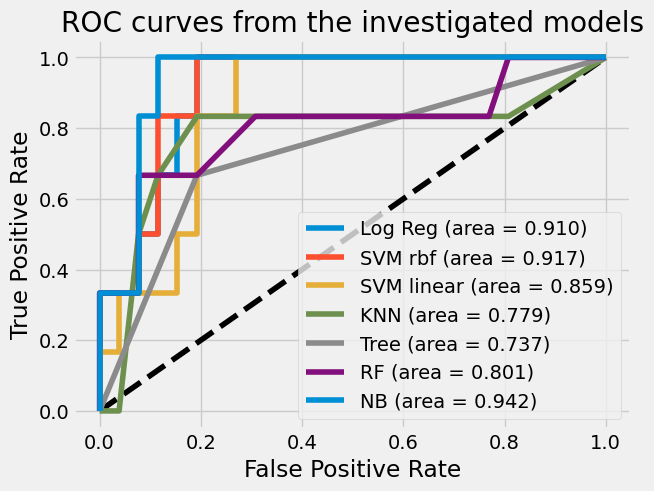

In [94]:
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_lr, tpr_lr, label='Log Reg (area = %0.3f)' % roc_auc_lr)
plt.plot(fpr_SVMrbf, tpr_SVMrbf, label='SVM rbf (area = %0.3f)' % roc_auc_SVMrbf)
plt.plot(fpr_SVMlinear, tpr_SVMlinear, label='SVM linear (area = %0.3f)' % roc_auc_SVMlinear)
plt.plot(fpr_KNN, tpr_KNN, label='KNN (area = %0.3f)' % roc_auc_KNN)
plt.plot(fpr_Tree, tpr_Tree, label='Tree (area = %0.3f)' % roc_auc_Tree)
plt.plot(fpr_rf, tpr_rf, label='RF (area = %0.3f)' % roc_auc_rf)
plt.plot(fpr_nb, tpr_nb, label='NB (area = %0.3f)' % roc_auc_nb)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves from the investigated models')
plt.legend(loc='best')
plt.show()

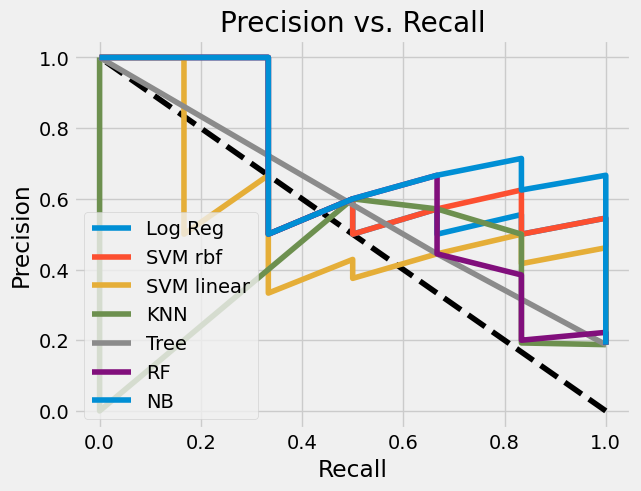

In [95]:
plt.plot([1, 0], [0, 1], 'k--')
plt.plot(recall_lr, precision_lr, label='Log Reg')
plt.plot(recall_SVMrbf, precision_SVMrbf, label='SVM rbf')
plt.plot(recall_SVMlinear, precision_SVMlinear, label='SVM linear')
plt.plot(recall_KNN, precision_KNN, label='KNN')
plt.plot(recall_Tree, precision_Tree, label='Tree')
plt.plot(recall_rf, precision_rf, label='RF')
plt.plot(recall_nb, precision_nb, label='NB')
plt.title('Precision vs. Recall')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='best')
plt.show()

In [96]:
new_models_dataframe2=pd.DataFrame({
    'CV Mean':cv_mean,
    "Standard deviation":std,
    'Maximum':maximum,
    'Minimum':minimum,
    'Accuracy':accuracy,
    'Precision':precision,
    'Recall':recall,
    'F1 Score':f1score,
},
    index=classifiers
)
new_models_dataframe2

,CV Mean,Standard deviation,Maximum,Minimum,Accuracy,Precision,Recall,F1 Score
Linear Svm,0.80,0.178885,1.0,0.4,0.86,0.909091,0.6250,0.740741
Radial Svm,0.68,0.222711,1.0,0.2,0.68,0.000000,0.0000,0.000000
Logistic Regression,0.80,0.178885,1.0,0.4,0.84,0.785714,0.6875,0.733333
KNN,0.68,0.240000,1.0,0.2,0.80,0.875000,0.4375,0.583333
Decision Tree,0.74,0.220000,1.0,0.4,1.00,1.000000,1.0000,1.000000
Naive Bayes,0.72,0.203961,1.0,0.4,0.74,0.588235,0.6250,0.606061
Random Forest,0.72,0.183303,1.0,0.4,1.00,1.000000,1.0000,1.000000


Text(0.5, 1.0, 'Classifiers Report')

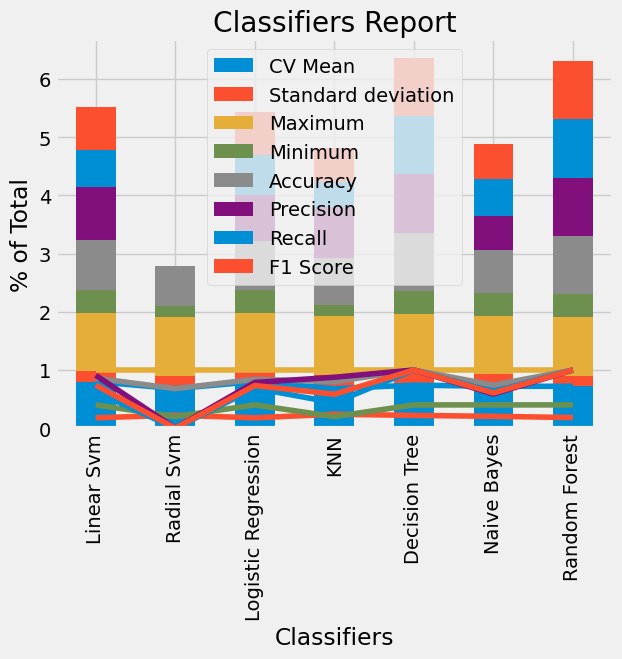

In [97]:
new_models_dataframe2.plot(kind="bar",stacked=True)
plt.plot(new_models_dataframe2.values)
plt.xticks(range(len(new_models_dataframe2)),labels=new_models_dataframe2.index)
plt.xlabel("Classifiers")
plt.ylabel("% of Total")
plt.title("Classifiers Report")

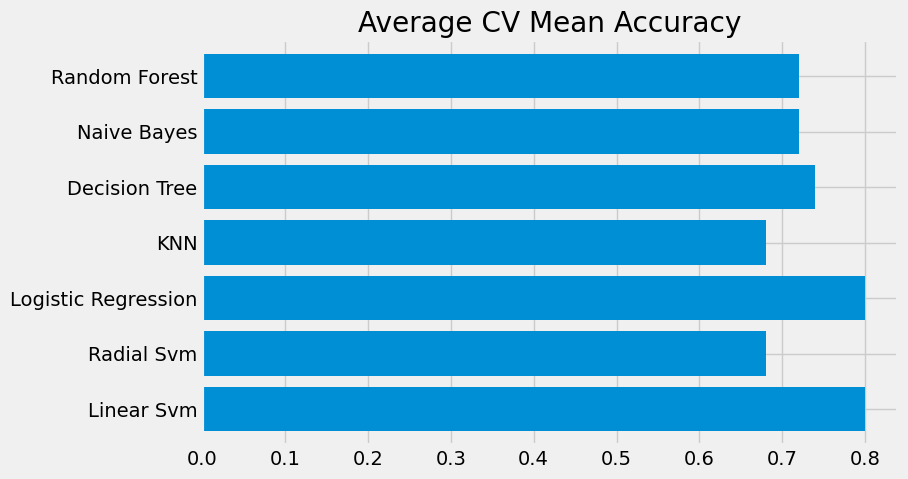

In [99]:
new_models_dataframe2['CV Mean'].plot.barh(width=0.8) # Changed ew_models_dataframe2 to new_models_dataframe2
plt.title('Average CV Mean Accuracy')
fig=plt.gcf()
fig.set_size_inches(8,5)
plt.show()

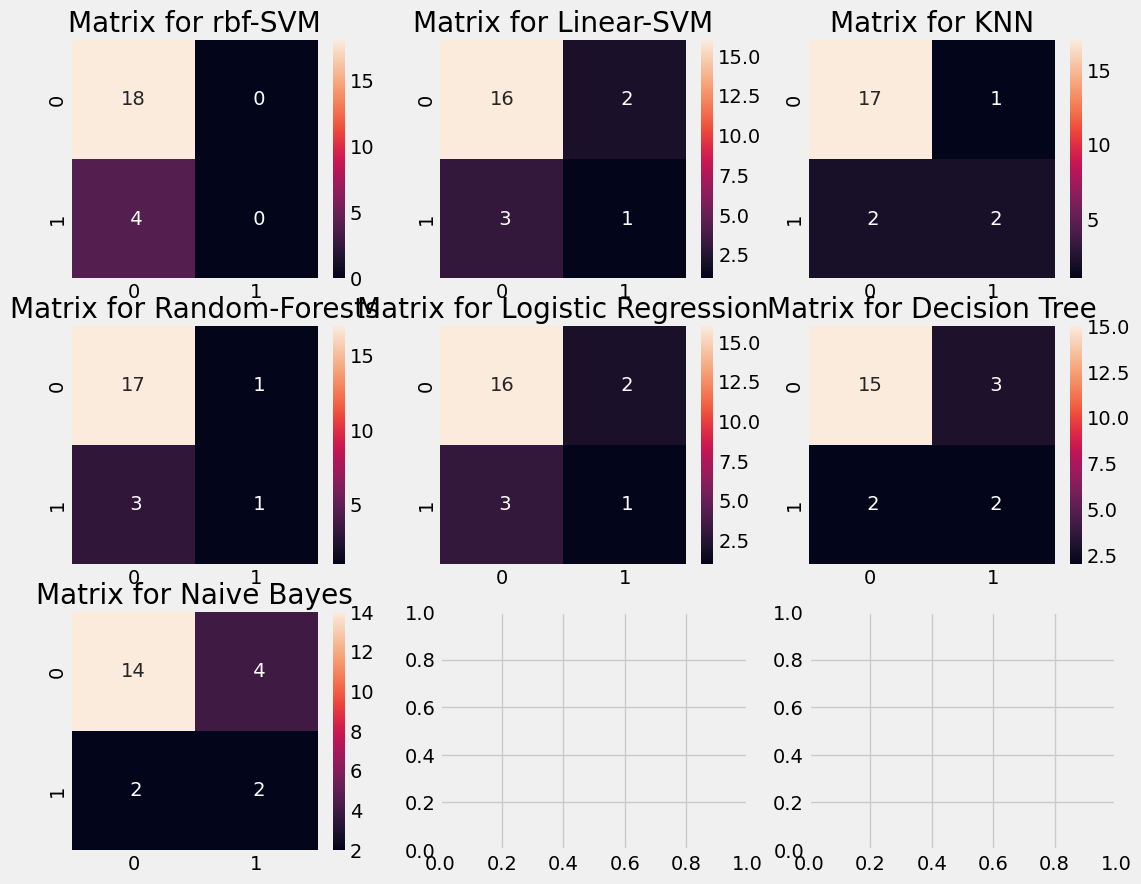

In [101]:
f,ax=plt.subplots(3,3,figsize=(12,10))
y_pred = cross_val_predict(svm.SVC(kernel='rbf'),val_X,val_Y,cv=10)
sns.heatmap(confusion_matrix(val_Y,y_pred),ax=ax[0,0],annot=True,fmt='2.0f')
ax[0,0].set_title('Matrix for rbf-SVM')
y_pred = cross_val_predict(svm.SVC(kernel='linear'),val_X,val_Y,cv=10)
sns.heatmap(confusion_matrix(val_Y,y_pred),ax=ax[0,1],annot=True,fmt='2.0f')
ax[0,1].set_title('Matrix for Linear-SVM')
y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=5),val_X,val_Y,cv=10)
sns.heatmap(confusion_matrix(val_Y,y_pred),ax=ax[0,2],annot=True,fmt='2.0f')
ax[0,2].set_title('Matrix for KNN')
y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100),val_X,val_Y,cv=10)
sns.heatmap(confusion_matrix(val_Y,y_pred),ax=ax[1,0],annot=True,fmt='2.0f')
ax[1,0].set_title('Matrix for Random-Forests')
y_pred = cross_val_predict(LogisticRegression(),val_X,val_Y,cv=10)
sns.heatmap(confusion_matrix(val_Y,y_pred),ax=ax[1,1],annot=True,fmt='2.0f')
ax[1,1].set_title('Matrix for Logistic Regression')
y_pred = cross_val_predict(DecisionTreeClassifier(),val_X,val_Y,cv=10)
sns.heatmap(confusion_matrix(val_Y,y_pred),ax=ax[1,2],annot=True,fmt='2.0f')
ax[1,2].set_title('Matrix for Decision Tree')
y_pred = cross_val_predict(GaussianNB(),val_X,val_Y,cv=10)
sns.heatmap(confusion_matrix(val_Y,y_pred),ax=ax[2,0],annot=True,fmt='2.0f')
ax[2,0].set_title('Matrix for Naive Bayes')
plt.subplots_adjust(hspace=0.2,wspace=0.2)
plt.show()

In [102]:
from sklearn.ensemble import VotingClassifier
ensemble_lin_rbf=VotingClassifier(estimators=[('KNN',KNeighborsClassifier(n_neighbors=5)),
                                              ('RBF',svm.SVC(probability=True,kernel='rbf',C=0.5,gamma=0.1)),
                                              ('RFor',RandomForestClassifier(n_estimators=500,random_state=0)),
                                              ('LR',LogisticRegression(C=0.05)),
                                              ('DT',DecisionTreeClassifier(random_state=0)),
                                              ('NB',GaussianNB()),
                                              ('svm',svm.SVC(kernel='linear',probability=True))
                                             ],
                       voting='soft').fit(train_X,train_Y)
print('The accuracy for ensembled model is:',ensemble_lin_rbf.score(test_X,test_Y))
cross=cross_val_score(ensemble_lin_rbf,val_X,val_Y, cv = 10,scoring = "accuracy")
print('The cross validated score is :',cross.mean())

The accuracy for ensembled model is: 0.875
The cross validated score is : 0.8


In [103]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.1)
result=cross_val_score(ada,val_X,val_Y,cv=10,scoring='accuracy')
print('The cross validated score for AdaBoost is:',result.mean())

The cross validated score for AdaBoost is: 0.8333333333333333


In [104]:
from sklearn.ensemble import GradientBoostingClassifier
grad=GradientBoostingClassifier(n_estimators=500,random_state=0,learning_rate=0.1)
result=cross_val_score(grad,val_X,val_Y,cv=10,scoring='accuracy')
print('The cross validated score for Gradient Boosting is:',result.mean())

The cross validated score for Gradient Boosting is: 0.8


In [105]:
xgboost=xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
result=cross_val_score(xgboost,val_X,val_Y,cv=10,scoring='accuracy')
print('The cross validated score for XGBoost is:',result.mean())

The cross validated score for XGBoost is: 0.75
